# Introdução
Nesse projeto aplicaremos métodos numéricos para a resolução de problemas de valor inicial para avaliar o trânsito numa avenida. Especificamente, a posição de cada veículo pode ser descrita como uma equação diferencial ordinária de segunda ordem que depende da velocidade e da distância ao veículo anterior.

# Modelo de Velocidade Ótima
O deslocamento de um veículo $i$ numa pista pode ser descrito pelo modelo de velocidade ótima em que o motorista ajusta a velocidade do seu veículo observando a distância ao carro a sua frente. Formalmente, o modelo de velocidade ótima estabelece que

$$
\frac{d^2x_i}{dt^2} = a\left[V\left(\Delta x_i\right) - \frac{dx_i}{dt} \right],  \forall i = 1, \ldots, N    \;(1)
$$

em que $x_i ≡ x_i(t)$ denota a posição do carro $i$ no instante de tempo $t$, $∆x_i = x_{i−1}(t) − x_i(t)$ representa a
distância do carro $i$ ao carro à frente $i − 1$, $V (·)$ é a função descrita abaixo que fornece a velocidade ótima
conhecendo a distância $∆x_i$, $N$ corresponde ao número de veículos na via e $a$ representa a sensibilidade do motorista (inverso do tempo de resposta). Desta forma, quanto maior o valor de $a$, mais rápido o carro
atingirá a velocidade ótima. Por simplicidade, vamos admitir $a = 1s^{-1}$ para todos os motoristas. Também vamos admitir que a velocidade ótima é dada pela equação

$$
V (∆x_i) = \frac{v_{max}}{2} \left[
\tanh \left( \frac{∆x_i − ∆s}{20} \right)
+ \tanh(4) \right] \;(2)
$$

em que $∆s$ representa a distância de segurançca em metros e $v_{max}$ é a velocidade máxima permitida na via.

# Dinâmica do Trânsito na Avenida Um

Nesse projeto vamos estudar a dinâmica de quatro carros ($i = 1, 2, 3, 4$) que vão para a Unicamp pela avenida um (avenida Dr. Romeu Tórtima). A velocidade máxima permitida nessa via é $v_{max} = 50km/h$ e, para essa velocidade, a distância de segurança estabelecida pelo código de trânsito é $∆s = 42m$. Vamos admitir que os carros vão partir do repouso no semárforo da praça General Dom José de San Martin (em frente a Drograsil e a Briquedolândia). Espeficiamente, vamos considerar $t = 0$ como sendo o instante em que o semáforo abriu e a sinalização do semáforo como posição $x = 0$, com sentido positivo na direção da Unicamp. Admitindo que há um ônibus na frente do primeiro carro, vamos admitir que a posição inicial dos quatro carros são:

$$
\begin{cases}
x_1(0) = −14 m \\
x_2(0) = −18 m \\
x_3(0) = −26 m \\
x_4(0) = −31 m.
\end{cases}
$$

Vamos admitir que a posição $β(t)$ (em metros) do ônibus no instante de tempo $t$ (em segundos) é descrito pela equação

$β(t) = 8t − 90 sen(0.1t)  \;(3)$

Tal como os carros, o ônibus também está parado no semáforo e vai para a Unicamp. O ônibus, porém, deverá fazer algumas paradas para pegar ou deixar passageiros.

# Questão 1
Apresente o sistema de equações diferenciais de primeira ordem e as condições iniciais usadas para determinar a posição de cada um dos quatro carros.



Substituindo $(2)$ em $(1)$, encontrei

$$
\frac{d^2x_i}{dt^2} = a\left[\frac{v_{max}}{2} \left[
\tanh \left( \frac{∆x_i − ∆s}{20} \right)
+ \tanh(4) \right] - \frac{dx_i}{dt} \right],  \forall i = 1, \ldots, N 
$$

que é equivalente a

$$
\frac{d^2x_i}{dt^2} = a\left[\frac{v_{max}}{2} \left[
\tanh \left( \frac{x_{i−1}(t) − x_i(t) − ∆s}{20} \right)
+ \tanh(4) \right] - \frac{dx_i}{dt} \right],  \forall i = 1, \ldots, N    \;(4)
$$

Em particular, $(4)$ é válido para os carros $1$, $2$, $3$ e $4$. Como o ônibus segue à frente do carro $1$, considerei $x_0(t) = \beta(t)$ e substituí $(3)$. Logo, segue o sistema:

$$
\begin{cases}
\frac{d^2x_1}{dt^2} = a\left[\frac{v_{max}}{2} \left[
\tanh \left( \frac{8t − 90 sen(0.1t) − x_1(t) − ∆s}{20} \right)
+ \tanh(4) \right] - \frac{dx_1}{dt} \right]
\\
\frac{d^2x_2}{dt^2} = a\left[\frac{v_{max}}{2} \left[
\tanh \left( \frac{x_1(t) − x_2(t) − ∆s}{20} \right)
+ \tanh(4) \right] - \frac{dx_2}{dt} \right]
\\
\frac{d^2x_3}{dt^2} = a\left[\frac{v_{max}}{2} \left[
\tanh \left( \frac{x_2(t) − x_3(t) − ∆s}{20} \right)
+ \tanh(4) \right] - \frac{dx_3}{dt} \right]
\\
\frac{d^2x_4}{dt^2} = a\left[\frac{v_{max}}{2} \left[
\tanh \left( \frac{x_3(t) − x_4(t) − ∆s}{20} \right)
+ \tanh(4) \right] - \frac{dx_4}{dt} \right]
\end{cases} 
$$

Adaptando o sistema para que ele seja resolvível pelos métodos numéricos estudados, realizei as seguintes substituições:

$$
\begin{cases}
y_1 = x_1\\
y_2 = x_1'\\
y_3 = x_2\\
y_4 = x_2'\\
y_5 = x_3\\
y_6 = x_3'\\
y_7 = x_4\\
y_8 = x_4'
\end{cases}
$$

Assim, trocando as variáveis e substituindo $∆s = 42m$, $v_{max} = 50km/h = \frac{50}{3,6} m/s$ e $a = 1s^{-1}$, obtive:

$$
\begin{cases}
y_1' = y_2\\
y_2' = \frac{125}{18} \left[
\tanh \left( \frac{8t − 90 sen(0.1t) − y_1(t) − 42}{20} \right)
+ \tanh(4) \right] - y_2\\
y_3' = y_4\\
y_4' = \frac{125}{18} \left[
\tanh \left( \frac{y_1(t) − y_3(t) − 42}{20} \right)
+ \tanh(4) \right] - y_4\\
y_5' = y_6\\
y_6' = \frac{125}{18} \left[
\tanh \left( \frac{y_3(t) − y_5(t) − 42}{20} \right)
+ \tanh(4) \right] - y_6\\
y_7' = y_8\\
y_8' = \frac{125}{18} \left[
\tanh \left( \frac{y_5(t) − y_7(t) − 42}{20} \right)
+ \tanh(4) \right] - y_8\\
\end{cases}
$$

As posições iniciais dos carros fornecem metade das condições iniciais necessárias. A outra metade origina-se do fato de que os carros partem, em repouso (velocidade inicial nula), do semáforo. Ou seja, as condições iniciais são (em metros para índices ímpares e metros por segundo para os pares):

$$
\begin{cases}
y_1(0) = -14\\
y_2(0) = 0\\
y_3(0) = -18\\
y_4(0) = 0\\
y_5(0) = -26\\
y_6(0) = 0\\
y_7(0) = -31\\
y_8(0) = 0
\end{cases}
$$

# Questão 2
Quanto tempo vai demorar para o quarto carro chegar ao balão da praça Carlos Drummond de Andrade que está localizado à 1.7km de distância do semáforo e pode ser considerado como uma entrada para a Unicamp?

## Determinação das Variáveis

Com o desenvolvimento da questão anterior e $x_0 = 0$, temos o sistema de equações diferenciais de primeira ordem definido:

$$
\boldsymbol{y}' = 
\boldsymbol{f}(t, \boldsymbol{y}) = 
\begin{bmatrix}
y_2\\
\frac{125}{18} \left[
\tanh \left( \frac{8t − 90 sen(0.1t) − y_1(t) − 42}{20} \right)
+ \tanh(4) \right] - y_2\\
y_4\\
\frac{125}{18} \left[
\tanh \left( \frac{y_1(t) − y_3(t) − 42}{20} \right)
+ \tanh(4) \right] - y_4\\
y_6\\
\frac{125}{18} \left[
\tanh \left( \frac{y_3(t) − y_5(t) − 42}{20} \right)
+ \tanh(4) \right] - y_6\\
y_8\\
\frac{125}{18} \left[
\tanh \left( \frac{y_5(t) − y_7(t) − 42}{20} \right)
+ \tanh(4) \right] - y_8\\
\end{bmatrix}
$$ com
$$
\boldsymbol{y}(0) =
\boldsymbol{y}_0 = 
\begin{bmatrix}
-14\\
0\\
-18\\
0\\
-26\\
0\\
-31\\
0
\end{bmatrix}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(t, y):
    cte = 125/18
    tanh4 = np.tanh(4)
    fout = np.empty(8)
    for i in range(0,8,2):
        fout[i] = y[i+1]
    for i in range(3,8,2):
        fout[i] = cte * (   np.tanh(  (y[i-3] - y[i-1] - 42) / 20  ) + tanh4   ) - y[i]
    fout[1] = cte * (   np.tanh(  (8*t - 90*np.sin(0.1*t) - y[0] - 42) / 20  ) + tanh4   ) - y[1]
    return fout

In [3]:
y0 = np.array([-14.0,0.0,-18.0,0.0,-26.0,0.0,-31.0,0.0])

## Método de Runge-Kutta de ordem 4

Para solucionar o problema, considerei o Método de Runge-Kutta de ordem 4, em que 

$\boldsymbol{y}_{k+1} = \boldsymbol{y}_k + \frac{h}{6} \left( \boldsymbol{k}_1 + 2\boldsymbol{k}_2 + 2\boldsymbol{k}_3 + \boldsymbol{k}_4 \right)$

com

$$
\begin{cases}
\boldsymbol{k}_1 = \boldsymbol{f}(t_k, \boldsymbol{y}_k) \\
\boldsymbol{k}_2 = \boldsymbol{f}(t_k + \frac{h}{2}, \boldsymbol{y}_k + \boldsymbol{k}_1\frac{h}{2}) \\
\boldsymbol{k}_3 = \boldsymbol{f}(t_k + \frac{h}{2}, \boldsymbol{y}_k + \boldsymbol{k}_2\frac{h}{2}) \\
\boldsymbol{k}_4 = \boldsymbol{f}(t_k + h, \boldsymbol{y}_k + \boldsymbol{k}_3 h )
\end{cases}
$$


In [4]:
def MetodoRK4(f,t0,tf,y0,h):
    k = 0
    t = [t0]
    y = [y0]
    while np.abs(t[-1] - tf) > 1.0e-5 and (t[-1] < tf):
        t.append(t[k]+h)
        k1 = f(t[k],y[k])
        k2 = f(t[k]+h/2,y[k]+k1*h/2)
        k3 = f(t[k]+h/2,y[k]+k2*h/2)
        k4 = f(t[k+1],y[k]+h*k3)
        y.append(y[k]+(h/6)*(k1+2*k2+2*k3+k4))
        k = k+1
    return t,np.array(y)

A seguir, executei o método e imprimi os últimos $100$ valores de $t$ e $y$.

In [5]:
h = 0.01
t0 = 0
tf = 240

In [6]:
tout, yout = MetodoRK4(f, t0, tf, y0, h)

In [7]:
tout[-100::]

[239.0099999999276,
 239.0199999999276,
 239.02999999992758,
 239.03999999992757,
 239.04999999992756,
 239.05999999992756,
 239.06999999992755,
 239.07999999992754,
 239.08999999992753,
 239.09999999992752,
 239.1099999999275,
 239.1199999999275,
 239.1299999999275,
 239.13999999992748,
 239.14999999992747,
 239.15999999992746,
 239.16999999992746,
 239.17999999992745,
 239.18999999992744,
 239.19999999992743,
 239.20999999992742,
 239.2199999999274,
 239.2299999999274,
 239.2399999999274,
 239.24999999992738,
 239.25999999992737,
 239.26999999992736,
 239.27999999992736,
 239.28999999992735,
 239.29999999992734,
 239.30999999992733,
 239.31999999992732,
 239.3299999999273,
 239.3399999999273,
 239.3499999999273,
 239.35999999992728,
 239.36999999992727,
 239.37999999992726,
 239.38999999992726,
 239.39999999992725,
 239.40999999992724,
 239.41999999992723,
 239.42999999992722,
 239.4399999999272,
 239.4499999999272,
 239.4599999999272,
 239.46999999992718,
 239.47999999992717,
 239.4

In [8]:
yout[-100::]

array([[1935.77707057,   12.83261214, 1859.63392242,   13.44975618,
        1789.21088601,   13.09003688, 1723.17919014,   12.68616084],
       [1935.90536024,   12.82531313, 1859.76841959,   13.44967625,
        1789.34178784,   13.09032859, 1723.30605406,   12.68662313],
       [1936.03357667,   12.81796523, 1859.90291594,   13.44959444,
        1789.47269258,   13.09061999, 1723.4329226 ,   12.68708505],
       [1936.16171938,   12.81056821, 1860.03741147,   13.44951075,
        1789.60360024,   13.09091106, 1723.55979576,   12.68754663],
       [1936.28978787,   12.80312182, 1860.17190615,   13.44942517,
        1789.7345108 ,   13.09120182, 1723.68667353,   12.68800784],
       [1936.41778165,   12.79562583, 1860.30639997,   13.44933768,
        1789.86542427,   13.09149225, 1723.81355592,   12.68846869],
       [1936.54570022,   12.78808001, 1860.4408929 ,   13.44924827,
        1789.99634065,   13.09178237, 1723.94044291,   12.68892919],
       [1936.67354308,   12.7804841 , 186

## Determinação do momento em que o carro 4 chegou ao balão

In [9]:
x1 = yout[:, 0]
x2 = yout[:, 2]
x3 = yout[:, 4]
x4 = yout[:, 6]

In [10]:
t = 1
while not (x4[t-1] <= 1700 <= x4[t]):
    t += 1
t_chegada = round(tout[t],2)
x_chegada = round(x4[t],2)
print(f"O carro 4 demorou, aproximadamente, {t_chegada} s para chegar ao balão.\nNesse instante, ele havia percorrido {x_chegada} m.")

O carro 4 demorou, aproximadamente, 237.18 s para chegar ao balão.
Nesse instante, ele havia percorrido 1700.04 m.


Fazendo alguns experimentos, variando $t_f$ e $h$, notei que $t_f = 240s$ incluía o momento em que o quarto carro chegou ao balão. Escolhi $h = 0,01s$ para obter maior precisão na previsão. Dessa forma, o resultado obtido foi $237,18s$.

Como execuções anteriores com $h=1s$ e $h=0,1s$ encontraram $238s$ para $1710,39m$ e $237,2s$ para $1700,3m$ -- respectivamente -- e o critério utilizado foi o primeiro valor de tempo que gerasse distância percorrida superior a $1700m$, julgo que a escolha $h=0,01s$ não prejudicou a exatidão do resultado.

## Gráfico Temporal da Posição

In [11]:
beta = lambda t: 8*t - 90*np.sin(0.1*t)

In [12]:
t = np.linspace(t0, tf, int(tf/h)+1)
x0 = beta(t)

In [13]:
autos = [x0, x1, x2, x3, x4]

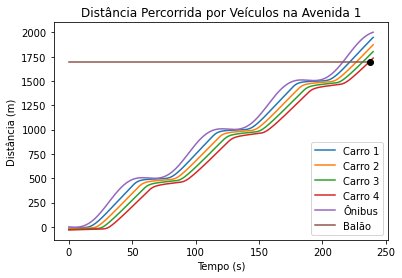

In [14]:
for i in range(1,5):
    plt.plot(tout, autos[i], label=f"Carro {i}")
plt.plot(tout, autos[0], label="Ônibus")
plt.plot([t0, tf], [1700, 1700], label="Balão")
plt.scatter(t_chegada, x_chegada, zorder=10, c="black")

plt.title("Distância Percorrida por Veículos na Avenida 1")
plt.xlabel("Tempo (s)")
plt.ylabel("Distância (m)")
plt.legend()
plt.show()

O gráfico acima exibe o compartamento dos veículos estudados na Avenida 1. Em preto, destaquei o momento em que o carro quatro chega ao balão. A análise gráfica confirma que o valor obtido é coerente (pois ele marca a intersecção entre as curvas do Carro 4 e do Balão) e que o comportamento das variáveis é consistente. Isto é, os carros seguem em ordem (sem ultrapassagem) e as paradas do ônibus foram respeitadas.

## Gráfico Temporal da Velocidade

In [15]:
v1 = yout[:, 1]
v2 = yout[:, 3]
v3 = yout[:, 5]
v4 = yout[:, 7]
vels = [v1,v2,v3,v4]

In [16]:
v0 = np.array([0] + [(x0[i] - x0[i-1])/h for i in range(1, len(x0))])

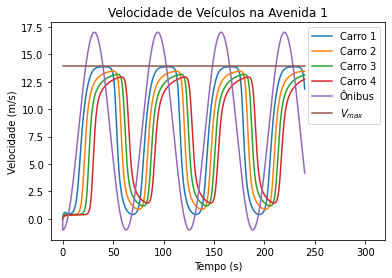

In [17]:
for i in range(4):
    plt.plot(tout, vels[i], label=f"Carro {i+1}")

plt.plot(tout, v0, label="Ônibus")
vmax = 50/3.6
plt.plot([t0, tf], [vmax, vmax], label="$V_{max}$")
plt.xlim(right=320)

plt.title("Velocidade de Veículos na Avenida 1")
plt.xlabel("Tempo (s)")
plt.ylabel("Velocidade (m/s)")
plt.legend(loc="upper right")
plt.show()

Além disso, vale notar que a análise da velocidade demonstra que os carros (controlados pelas equações que consideram a velocidade máxima) respeitaram o limite de velocidade de aproximadamente $13,9 \; m/s$ da via a todo tempo. Por outro lado, o ônibus, definido por sua própria equação, não o fez.